In [7]:
!pip install qiskit
!pip install qiskit_aer

In [8]:
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [9]:
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)




In [10]:
# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


In [11]:
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")


In [12]:
# ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
✅ Function is BALANCED


#  Qiskit Deutsch–Jozsa Algorithm (Enhanced Version)
### With Complete Task Implementations (Qiskit 2.x Compatible)

## Task 1 — Custom Balanced Oracle
Implement a balanced oracle that flips the output qubit for half of all possible inputs (not just parity).

In [15]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Balanced Oracle (custom) ---
def balanced_oracle_custom(qc, qubits, output_qubit):
    # Flip output for half of all possible inputs using CX and CCX
    qc.cx(qubits[0], output_qubit)
    qc.ccx(qubits[0], qubits[1], output_qubit)
    return qc

# --- Deutsch–Jozsa Circuit Setup ---
n = 2
qc = QuantumCircuit(n + 1, n)
qc.x(n)
qc.h(range(n + 1))
balanced_oracle_custom(qc, list(range(n)), n)
qc.h(range(n))
qc.measure(range(n), range(n))

# --- Simulation ---
sim = AerSimulator()
result = sim.run(qc).result()
counts = result.get_counts()

print("Measurement Results:", counts)
plot_histogram(counts)
plt.show()


Measurement Results: {'10': 272, '00': 270, '11': 238, '01': 244}


## Task 2 — Vary Input Qubit Count

In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Define a balanced oracle (for demo) ---
def balanced_oracle(qc, qubits, output_qubit):
    qc.cx(qubits[0], output_qubit)
    if len(qubits) > 1:
        qc.cx(qubits[1], output_qubit)
    return qc

# --- Deutsch–Jozsa function ---
def deutsch_jozsa(oracle_func, n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    oracle_func(qc, list(range(n)), n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# --- Run for multiple input sizes ---
sim = AerSimulator()

for num_qubits in [2, 3, 4]:
    qc = deutsch_jozsa(balanced_oracle, num_qubits)
    result = sim.run(qc).result()
    counts = result.get_counts()
    print(f"\nInput qubits: {num_qubits}\n", counts)
    plot_histogram(counts)
    plt.show()



Input qubits: 2
 {'11': 1024}

Input qubits: 3
 {'011': 1024}

Input qubits: 4
 {'0011': 1024}


Task 3 — Noise Simulation
Add depolarizing noise to visualize realistic device behavior.

In [18]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Balanced oracle (same as before) ---
def balanced_oracle(qc, qubits, output_qubit):
    qc.cx(qubits[0], output_qubit)
    if len(qubits) > 1:
        qc.cx(qubits[1], output_qubit)
    return qc

# --- Deutsch–Jozsa function ---
def deutsch_jozsa(oracle_func, n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    oracle_func(qc, list(range(n)), n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# --- Create the noise model ---
noise_model = NoiseModel()
# Apply 3% depolarizing error on 1-qubit gates and 5% on 2-qubit gates
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.03, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 2), ['cx'])

# --- Build the circuit for n=3 qubits ---
n = 3
qc = deutsch_jozsa(balanced_oracle, n)

# --- Run on noisy simulator ---
noisy_sim = AerSimulator(noise_model=noise_model)
noisy_result = noisy_sim.run(qc, shots=1024).result()
noisy_counts = noisy_result.get_counts()

# --- Run ideal simulation for comparison ---
ideal_sim = AerSimulator()
ideal_result = ideal_sim.run(qc, shots=1024).result()
ideal_counts = ideal_result.get_counts()

# --- Print and visualize ---
print("✅ Ideal counts:", ideal_counts)
print("⚠️ Noisy counts:", noisy_counts)

print("\nObserve how additional bitstrings appear due to noise.")
plot_histogram([ideal_counts, noisy_counts], legend=['Ideal', 'Noisy'])
plt.show()


✅ Ideal counts: {'011': 1024}
⚠️ Noisy counts: {'011': 876, '010': 32, '111': 28, '001': 55, '000': 27, '110': 3, '101': 2, '100': 1}

Observe how additional bitstrings appear due to noise.


## Task 4 — Run on IBM Quantum Device
Execute the circuit on a real IBM backend and compare results.

✅ Connected to IBM Quantum!
Using backend: ibm_fez
🧩 Simulator counts: {'11': 1008, '10': 6, '00': 1, '01': 9}
🧠 Real hardware counts: {'11': 3896, '01': 68, '10': 112, '00': 20}


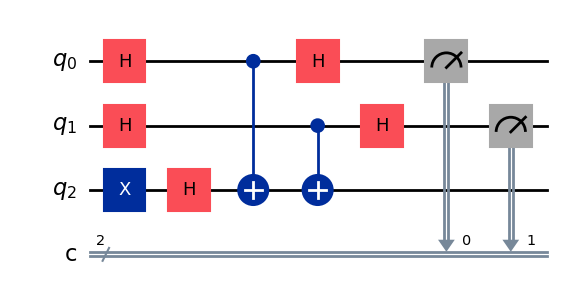

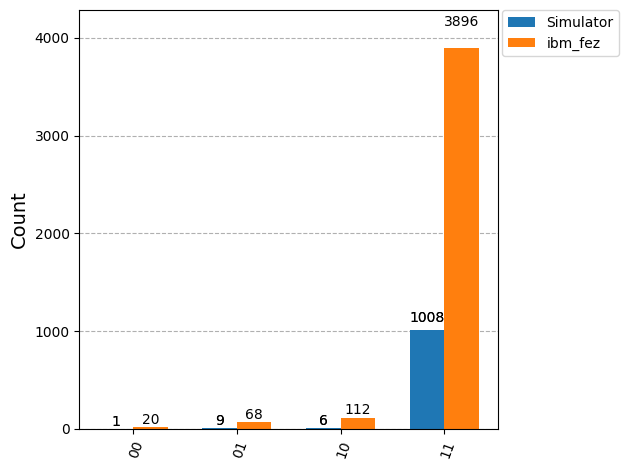

In [30]:


# ===============================
#  Deutsch–Jozsa Algorithm (Simulator + Real IBM QPU)
#  Using Qiskit Runtime 2.x
# ===============================

%matplotlib inline
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- 1️⃣ Connect to IBM Quantum instance ---
service = QiskitRuntimeService(
    channel="ibm_cloud",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4dc5764d3d19426683311653ea0e3b13:a8f4c967-1c47-46e8-bd38-95565a5be40d::"
)
print("✅ Connected to IBM Quantum!")

# --- 2️⃣ Select backend ---
backend_real = service.backend("ibm_fez")   # change if you prefer another real device
backend_sim = AerSimulator.from_backend(backend_real)
print("Using backend:", backend_real.name)

# --- 3️⃣ Define Balanced Oracle ---
def balanced_oracle(qc, qubits, output_qubit):
    qc.cx(qubits[0], output_qubit)
    if len(qubits) > 1:
        qc.cx(qubits[1], output_qubit)
    return qc

# --- 4️⃣ Deutsch–Jozsa circuit ---
def deutsch_jozsa(oracle_func, n):
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    oracle_func(qc, list(range(n)), n)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

qc = deutsch_jozsa(balanced_oracle, 2)
qc.draw("mpl")

# --- 5️⃣ Transpile circuit ---
pm = generate_preset_pass_manager(backend=backend_sim, optimization_level=1)
isa_qc = pm.run(qc)

# --- 6️⃣ Run on noisy simulator ---
sampler_sim = Sampler(mode=backend_sim)
res_sim = sampler_sim.run([isa_qc]).result()

bitarray_sim = res_sim[0].data["c"]          # access the classical register
sim_counts = bitarray_sim.get_counts()       # convert BitArray → counts dict
print("🧩 Simulator counts:", sim_counts)

# --- 7️⃣ Run on real IBM backend ---
sampler_real = Sampler(mode=backend_real)
res_real = sampler_real.run([isa_qc]).result()

bitarray_real = res_real[0].data["c"]
real_counts = bitarray_real.get_counts()
print("🧠 Real hardware counts:", real_counts)

# --- 8️⃣ Compare results ---
plot_histogram([sim_counts, real_counts], legend=["Simulator", backend_real.name])
plt.show()





In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel="ibm_cloud",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/4dc5764d3d19426683311653ea0e3b13:a8f4c967-1c47-46e8-bd38-95565a5be40d::"
)

print("✅ Connected. Available backends:")
for backend in service.backends():
    print("-", backend.name)


✅ Connected. Available backends:
- ibm_fez
- ibm_marrakesh
- ibm_torino


##  Task 5 — Circuit Unitary Analysis
Inspect the oracle unitary to understand how it maps input states.

In [31]:

from qiskit.quantum_info import Operator

qc = QuantumCircuit(3)
balanced_oracle(qc, [0, 1], 2)

oracle_gate = qc.to_gate(label="Oracle")
print(oracle_gate.definition)

print("\nUnitary matrix:")
print(Operator(qc).data)


               
q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘

Unitary matrix:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
